In [1]:
from factory2 import Factory
from factory import mutate_swap, mutate_inversion, mutate_scramble, alternating_edge_crossover, ordered_crossover

In [2]:
factory = Factory("test_1.txt", seed=200)

In [3]:
from deap import base, tools, creator, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateSwapDayOrder, factory.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	return (factory.evaluateTruckScedule(individual), )


In [5]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, factory.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

In [6]:
toolbox.register("evaluate", fitness)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", factory.crossoverTruck)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [7]:
## build and run the GA
size = 500
starting_pop = toolbox.populationInit(size)
print(f'debug type {type(starting_pop[0])}')
# print(f'debug\n{len(starting_pop[0])}')
# starting_pop[0].extend([-1, -2])
# print(f'debug\n{starting_pop[0]}')
# starting_pop[0].insert(0, 1)
# print(f'debug\n{starting_pop[0]}')
# print(f'debug\n{type(factory.mutateExchangeDeliverDay(starting_pop[0], 1)[0])}')
description = {}
print(f'debug {factory.evaluateTruckScedule(starting_pop[0], detail_summary=description)}')
print(description)
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(5)


debug type <class 'deap.creator.individual'>
debug 15121251529.214108
{'total_distance': 151212.34029214107, 'total_no_truck': 85, 'max_no_truck': 9, 'violations': 0}


gen	nevals	min        	avg        
0  	500   	1.40437e+10	1.48064e+10
1  	412   	1.39332e+10	1.57815e+10
2  	420   	1.38486e+10	1.7328e+10 
3  	414   	1.38258e+10	1.56144e+10
4  	415   	1.37047e+10	1.69622e+10
5  	403   	1.3598e+10 	1.36231e+11
6  	419   	1.36024e+10	1.54841e+10
7  	404   	1.34649e+10	1.52283e+10
8  	408   	1.32639e+10	1.61855e+10
9  	412   	1.32164e+10	1.56245e+10
10 	408   	1.32111e+10	1.71453e+10
11 	403   	1.30984e+10	1.57782e+10
12 	412   	1.30062e+10	1.76804e+10
13 	418   	1.3092e+10 	1.27777e+11
14 	404   	1.29778e+10	1.08028e+11
15 	402   	1.29608e+10	1.43635e+10
16 	418   	1.28691e+10	1.47065e+10
17 	389   	1.28884e+10	1.54601e+10
18 	411   	1.28087e+10	1.45292e+10
19 	421   	1.28087e+10	2.27677e+11
20 	406   	1.28087e+10	1.28825e+11
21 	397   	1.27618e+10	1.53545e+10
22 	419   	1.27377e+10	1.75542e+10
23 	400   	1.27244e+10	1.55054e+10
24 	384   	1.2719e+10 	1.50564e+10
25 	407   	1.26999e+10	1.50261e+10
26 	410   	1.26885e+10	1.15233e+11
27 	419   	1.26609e+

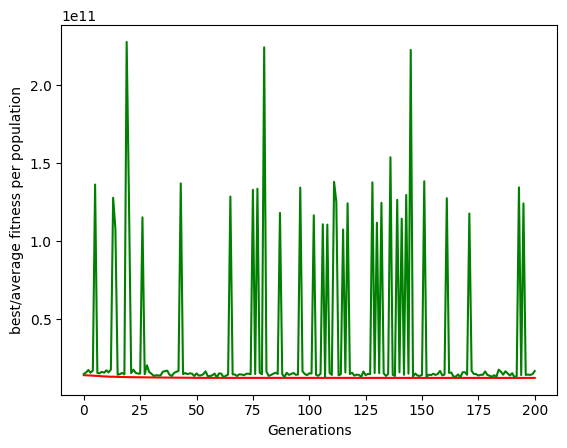

In [8]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 200

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

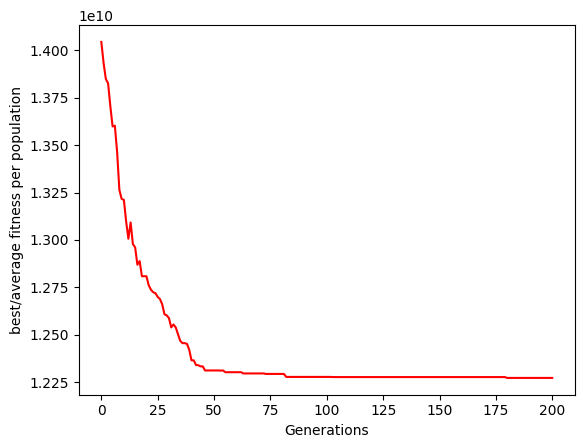

In [9]:
plt.plot(logbook.select("min"), color='red')
# plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [10]:

description = {}
res = factory.evaluateTruckScedule(hof[0], detail_summary=description)
print(description)
print(res)
print(type(hof[0]))

{'total_distance': 122726.21863109924, 'total_no_truck': 66, 'max_no_truck': 6, 'violations': 0}
12272634463.109924
<class 'deap.creator.individual'>
